# Merging, Joining, Concatination in Pandas

In [1]:
import pandas as pd

In [3]:
courses =pd.read_csv("datasets\courses.csv")
students =pd.read_csv("datasets\students.csv")
nov =pd.read_csv(r"datasets\reg-month1.csv")
dec =pd.read_csv(r"datasets\reg-month2.csv")
matches =pd.read_csv("datasets\matches.csv")
deliveries =pd.read_csv("datasets\deliveries.csv")

## pd.concat
- Stack the data

In [4]:
# this will retail the original index, axis =1 for horizontally stacking
pd.concat([nov, dec])

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [5]:
regs =pd.concat([nov, dec], ignore_index=True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [6]:
# concat as multindex df
new =pd.concat([nov, dec], keys =["Nov", "Dec"])

In [7]:
new

student_id  course_id
Nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [8]:
# want 1st student who bought course in december
new.loc["Dec"].iloc[0]

student_id    3
course_id     5
Name: 0, dtype: int64

## Join
- Inner Join
- Outer Join
- Left Join
- Right Join

### Inner Join
<img src="images\1.png" alt="alt text" width="900" height="500">

In [9]:
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [10]:
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [11]:
students.merge(regs , how ="inner", on ="student_id")

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [12]:
# left join
courses

,course_id,course_name,price
0,1,python,2499
1,2,sql,3499
2,3,data analysis,4999
3,4,machine learning,9999
4,5,tableau,2499
5,6,power bi,1899
6,7,ms sxcel,1599
7,8,pandas,1099
8,9,plotly,699
9,10,pyspark,2499


In [13]:
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


### Left Join
<img src="images\left.png" alt="alt text" width="900" height="500">

In [14]:
courses.merge(regs, how ="left", on ="course_id")

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


### Right Join
<img src="images\right.png" alt="alt text" width="900" height="500">

In [15]:
regs.merge(courses, how ="right", on ="course_id")

,student_id,course_id,course_name,price
0,23.0,1,python,2499
1,18.0,1,python,2499
2,1.0,1,python,2499
3,15.0,1,python,2499
4,21.0,1,python,2499
5,25.0,1,python,2499
6,12.0,1,python,2499
7,14.0,1,python,2499
8,38.0,1,python,2499
9,19.0,2,sql,3499


### outer join
<img src="images\outer.png" alt="alt text" width="900" height="500">

In [16]:
regs1 =regs.copy()
regs1.iloc[0]["course_id"] =100

In [17]:
regs1

,student_id,course_id
0,23,100
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [18]:
courses.merge(regs1, how="outer", on="course_id")

,course_id,course_name,price,student_id
0,1,python,2499.0,18.0
1,1,python,2499.0,1.0
2,1,python,2499.0,15.0
3,1,python,2499.0,21.0
4,1,python,2499.0,25.0
5,1,python,2499.0,12.0
6,1,python,2499.0,14.0
7,1,python,2499.0,38.0
8,2,sql,3499.0,19.0
9,2,sql,3499.0,7.0


In [19]:
# find total revenue genrated
courses.merge(regs, how="inner", on ="course_id")["price"].sum()

154247

In [20]:
# print registration table (name, price, course)
regs.merge(students, how="inner", on ="student_id").merge(courses, how="inner", on ="course_id")[["name", "course_name", "price"]]


,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,python,2499
2,Fardeen Mahabir,python,2499
3,Kailash Harjo,python,2499
4,Seema Kota,python,2499
5,Shashank D’Alia,python,2499
6,Radha Dutt,python,2499
7,Pranab Natarajan,python,2499
8,Chhavi Lachman,machine learning,9999
9,Qabeel Raman,machine learning,9999


<Axes: xlabel='course_name'>

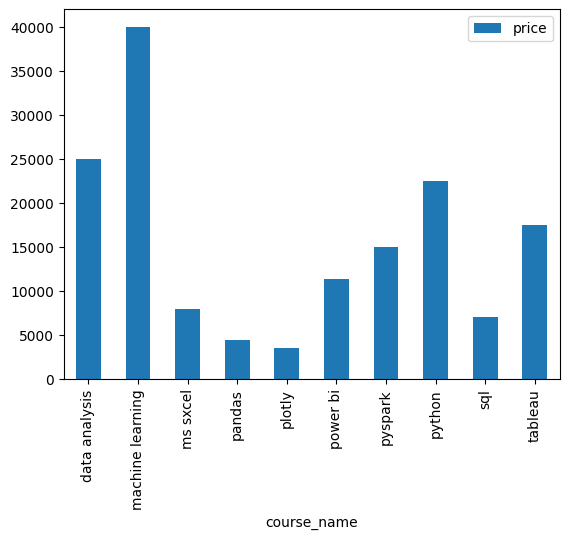

In [21]:
# plot a bar chart for a revenue
regs.merge(courses, how="inner", on ="course_id")[["course_name", "price"]].groupby("course_name").sum().plot(kind ="bar")

In [22]:
# find students who enrolled in both months
nov.merge(dec, how ="inner", on ="student_id").merge(students, how ="inner", on ="student_id")["name"].unique()

array(['Chhavi Lachman', 'Fardeen Mahabir', 'Elias Dodiya',
       'Kailash Harjo', 'Tarun Thaker', 'Yash Sethi',
       'David Mukhopadhyay', 'Yasmin Palan', 'Parveen Bhalla'],
      dtype=object)

In [23]:
# find courses that got no enrollment
import numpy as np
m =courses.merge(regs, how="left", on="course_id")
m[m["student_id"].isna()==True]["course_name"]

53    Numpy
54      C++
Name: course_name, dtype: object

In [24]:
# find students who do not enroll in any courses
m =students.merge(regs, how="left", on ="student_id")
m[m["course_id"].isna()==True]["name"]

7            Marlo Dugal
8            Kusum Bahri
9     Lakshmi Contractor
15        Radheshyam Dey
16     Nitika Chatterjee
17        Aayushman Sant
43         Hanuman Hegde
Name: name, dtype: object

In [25]:
# patner name for all enrolled studnets (self join)
students.merge(students, how="inner", left_on="partner", right_on="student_id")[["name_x", "name_y"]]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


<Axes: xlabel='name'>

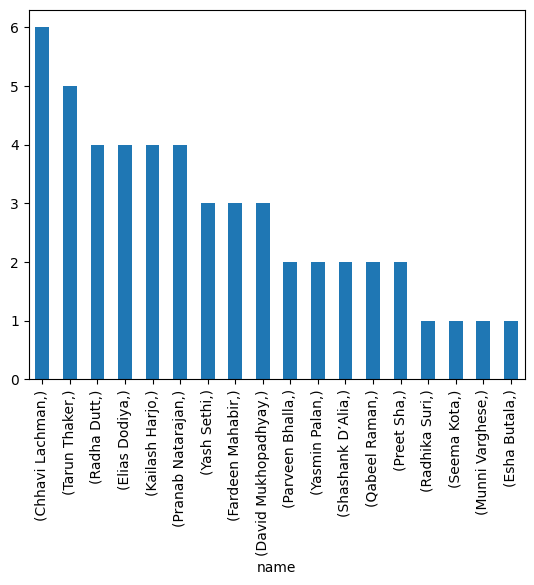

In [26]:
# find top 3 students wh did most enrollment
regs.merge(students, how="inner", on ="student_id")[["name"]].value_counts().sort_values(ascending=False).plot(kind ="bar")

In [27]:
# find top 3 students who spend ost money on courses
students.merge(regs, how="inner", on="student_id").merge(courses, how="inner", on="course_id")[["name", "price"]].groupby("name").sum()["price"].sort_values(ascending=False)[0:3]

name
Chhavi Lachman      22594
Pranab Natarajan    15096
Qabeel Raman        13498
Name: price, dtype: int64